<a href="https://colab.research.google.com/github/Mj-Novoa/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [89]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [90]:
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

print(f"Ingreso total Tienda 1: {ingreso_total_tienda1}")
print(f"Ingreso total Tienda 2: {ingreso_total_tienda2}")
print(f"Ingreso total Tienda 3: {ingreso_total_tienda3}")
print(f"Ingreso total Tienda 4: {ingreso_total_tienda4}")

Ingreso total Tienda 1: 1150880400.0
Ingreso total Tienda 2: 1116343500.0
Ingreso total Tienda 3: 1098019600.0
Ingreso total Tienda 4: 1038375700.0


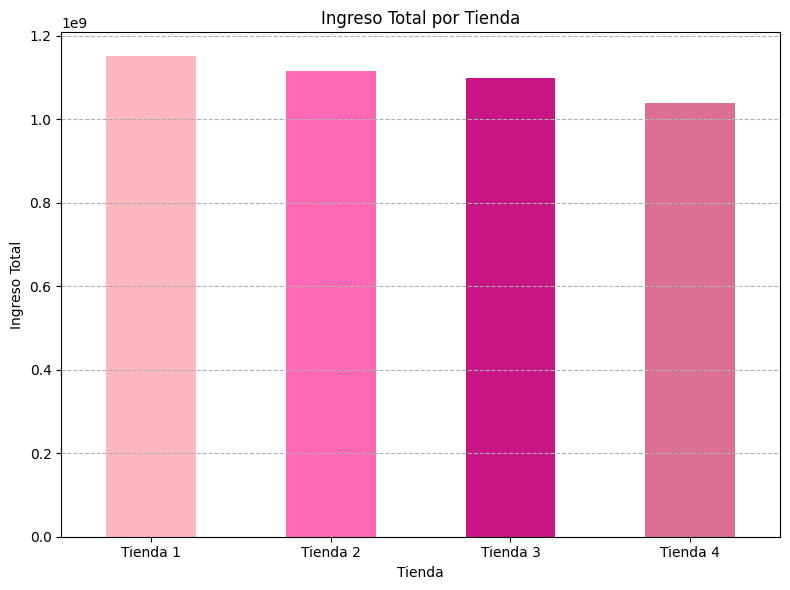

In [91]:
import matplotlib.pyplot as plt

ingresos_por_tienda = pd.Series({
    'Tienda 1': ingreso_total_tienda1,
    'Tienda 2': ingreso_total_tienda2,
    'Tienda 3': ingreso_total_tienda3,
    'Tienda 4': ingreso_total_tienda4
})

plt.figure(figsize=(8, 6))
ingresos_por_tienda.plot(kind='bar', color=['#FFB6C1', '#FF69B4', '#C71585', '#DB7093'])
plt.title('Ingreso Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [92]:
tiendas_unificadas = pd.concat([tienda, tienda2, tienda3, tienda4], keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

tiendas_unificadas = tiendas_unificadas.reset_index()

tiendas_unificadas = tiendas_unificadas.rename(columns={'level_0': 'Tienda'})

ventas_por_categoria = tiendas_unificadas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

for tienda_nombre in tiendas_unificadas['Tienda'].unique():
    print(f"\nCategorías más vendidas en {tienda_nombre}:")
    ventas_tienda = ventas_por_categoria[ventas_por_categoria['Tienda'] == tienda_nombre].sort_values(by='Cantidad de Ventas', ascending=False).reset_index(drop=True)
    display(ventas_tienda)


Categorías más vendidas en Tienda 1:


,Tienda,Categoría del Producto,Cantidad de Ventas
0,Tienda 1,Muebles,465
1,Tienda 1,Electrónicos,448
2,Tienda 1,Juguetes,324
3,Tienda 1,Electrodomésticos,312
4,Tienda 1,Deportes y diversión,284
5,Tienda 1,Instrumentos musicales,182
6,Tienda 1,Libros,173
7,Tienda 1,Artículos para el hogar,171



Categorías más vendidas en Tienda 2:


,Tienda,Categoría del Producto,Cantidad de Ventas
0,Tienda 2,Muebles,442
1,Tienda 2,Electrónicos,422
2,Tienda 2,Juguetes,313
3,Tienda 2,Electrodomésticos,305
4,Tienda 2,Deportes y diversión,275
5,Tienda 2,Instrumentos musicales,224
6,Tienda 2,Libros,197
7,Tienda 2,Artículos para el hogar,181



Categorías más vendidas en Tienda 3:


,Tienda,Categoría del Producto,Cantidad de Ventas
0,Tienda 3,Muebles,499
1,Tienda 3,Electrónicos,451
2,Tienda 3,Juguetes,315
3,Tienda 3,Electrodomésticos,278
4,Tienda 3,Deportes y diversión,277
5,Tienda 3,Libros,185
6,Tienda 3,Artículos para el hogar,177
7,Tienda 3,Instrumentos musicales,177



Categorías más vendidas en Tienda 4:


,Tienda,Categoría del Producto,Cantidad de Ventas
0,Tienda 4,Muebles,480
1,Tienda 4,Electrónicos,451
2,Tienda 4,Juguetes,338
3,Tienda 4,Deportes y diversión,277
4,Tienda 4,Electrodomésticos,254
5,Tienda 4,Artículos para el hogar,201
6,Tienda 4,Libros,187
7,Tienda 4,Instrumentos musicales,170


In [93]:
categorias_tienda = tienda['Categoría del Producto'].value_counts()
categorias_tienda2 = tienda2['Categoría del Producto'].value_counts()
categorias_tienda3 = tienda3['Categoría del Producto'].value_counts()
categorias_tienda4 = tienda4['Categoría del Producto'].value_counts()

mejores_categorias = categorias_tienda[categorias_tienda == categorias_tienda.max()]
mejores_categorias2 = categorias_tienda2[categorias_tienda2 == categorias_tienda2.max()]
mejores_categorias3 = categorias_tienda3[categorias_tienda3 == categorias_tienda3.max()]
mejores_categorias4 = categorias_tienda4[categorias_tienda4 == categorias_tienda4.max()]

print(f"Categorías más populares en la tienda 1: {', '.join(mejores_categorias.index.tolist())}")
print(f"Categorías más populares en la tienda 2: {', '.join(mejores_categorias2.index.tolist())}")
print(f"Categorías más populares en la tienda 3: {', '.join(mejores_categorias3.index.tolist())}")
print(f"Categorías más populares en la tienda 4: {', '.join(mejores_categorias4.index.tolist())}")


Categorías más populares en la tienda 1: Muebles
Categorías más populares en la tienda 2: Muebles
Categorías más populares en la tienda 3: Muebles
Categorías más populares en la tienda 4: Muebles


# 3. Calificación promedio de la tienda


In [168]:
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

print(f"Calificación promedio Tienda 1: {calificacion_promedio_tienda1:.2f}")
print(f"Calificación promedio Tienda 2: {calificacion_promedio_tienda2:.2f}")
print(f"Calificación promedio Tienda 3: {calificacion_promedio_tienda3:.2f}")
print(f"Calificación promedio Tienda 4: {calificacion_promedio_tienda4:.2f}")

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


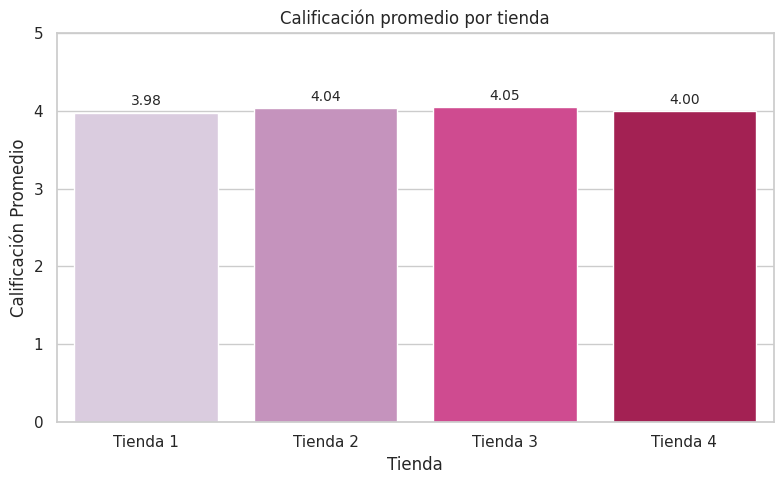

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)



calificaciones = {
    'Tienda 1': tienda['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

# Crear DataFrame para graficar
df_calificaciones = pd.DataFrame(list(calificaciones.items()), columns=['Tienda', 'Calificación Promedio'])

# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Gráfico de barras
ax = sns.barplot(
    data=df_calificaciones,
    x='Tienda',
    y='Calificación Promedio',
    hue='Tienda',
    palette='PuRd',
    legend=False
)

# Añadir etiquetas numéricas arriba de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding=3)

# Ajustes finales
plt.ylim(0, 5)
plt.title('Calificación promedio por tienda')
plt.ylabel('Calificación Promedio')
plt.xlabel('Tienda')
plt.tight_layout()
plt.show()

In [104]:
calificacion_promedio_por_categoria = tiendas_unificadas.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
calificacion_promedio_por_categoria = calificacion_promedio_por_categoria.rename(columns={'Calificación': 'Calificación Promedio'})

calificacion_promedio_por_categoria = calificacion_promedio_por_categoria.sort_values(by='Calificación Promedio', ascending=False)

print("Calificación promedio de los clientes por categoría (ordenado de mayor a menor):")
display(calificacion_promedio_por_categoria)

Calificación promedio de los clientes por categoría (ordenado de mayor a menor):


,Categoría del Producto,Calificación Promedio
5,Juguetes,4.070543
7,Muebles,4.033934
2,Electrodomésticos,4.014795
6,Libros,4.004043
4,Instrumentos musicales,4.003984
3,Electrónicos,3.992664
1,Deportes y diversión,3.988320
0,Artículos para el hogar,3.979452


In [108]:
calificacion_promedio_por_producto = tiendas_unificadas.groupby('Producto')['Calificación'].mean().reset_index()
calificacion_promedio_por_producto = calificacion_promedio_por_producto.rename(columns={'Calificación': 'Calificación Promedio'})

calificacion_promedio_por_producto = calificacion_promedio_por_producto.sort_values(by='Calificación Promedio', ascending=False)

print("Calificación promedio de los clientes por producto (ordenado de mayor a menor):")
display(calificacion_promedio_por_producto)

Calificación promedio de los clientes por producto (ordenado de mayor a menor):


,Producto,Calificación Promedio
23,Impresora,4.239362
26,Juego de mesa,4.217143
44,Sillón,4.178571
39,Refrigerador,4.162304
24,Iniciando en programación,4.133333
7,Batería,4.133005
9,Bloques de construcción,4.110553
27,Kit de bancas,4.106383
0,Ajedrez de madera,4.105556
12,Carrito de control remoto,4.097087


# 4. Productos más y menos vendidos

In [129]:
import pandas as pd


tabla_productos_extremos = pd.DataFrame([
    {
        'Tienda': tienda,
        'Categoria': tipo,
        'Producto': datos['Producto'],
        'Cantidad de Ventas': datos['Cantidad de Ventas']
    }
    for tienda, productos in productos_mas_menos_vendidos_por_tienda.items()
    for tipo, datos in productos.items()
])


for tienda, df in tabla_productos_extremos.groupby('Tienda'):
    print(f"\n📍 {tienda}")
    display(df.reset_index(drop=True))



📍 Tienda 1


,Tienda,Categoria,Producto,Cantidad de Ventas
0,Tienda 1,Más Vendido,Armario,60
1,Tienda 1,Menos Vendido,Auriculares con micrófono,33



📍 Tienda 2


,Tienda,Categoria,Producto,Cantidad de Ventas
0,Tienda 2,Más Vendido,Iniciando en programación,65
1,Tienda 2,Menos Vendido,Juego de mesa,32



📍 Tienda 3


,Tienda,Categoria,Producto,Cantidad de Ventas
0,Tienda 3,Más Vendido,Kit de bancas,57
1,Tienda 3,Menos Vendido,Bloques de construcción,35



📍 Tienda 4


,Tienda,Categoria,Producto,Cantidad de Ventas
0,Tienda 4,Más Vendido,Cama box,62
1,Tienda 4,Menos Vendido,Guitarra eléctrica,33


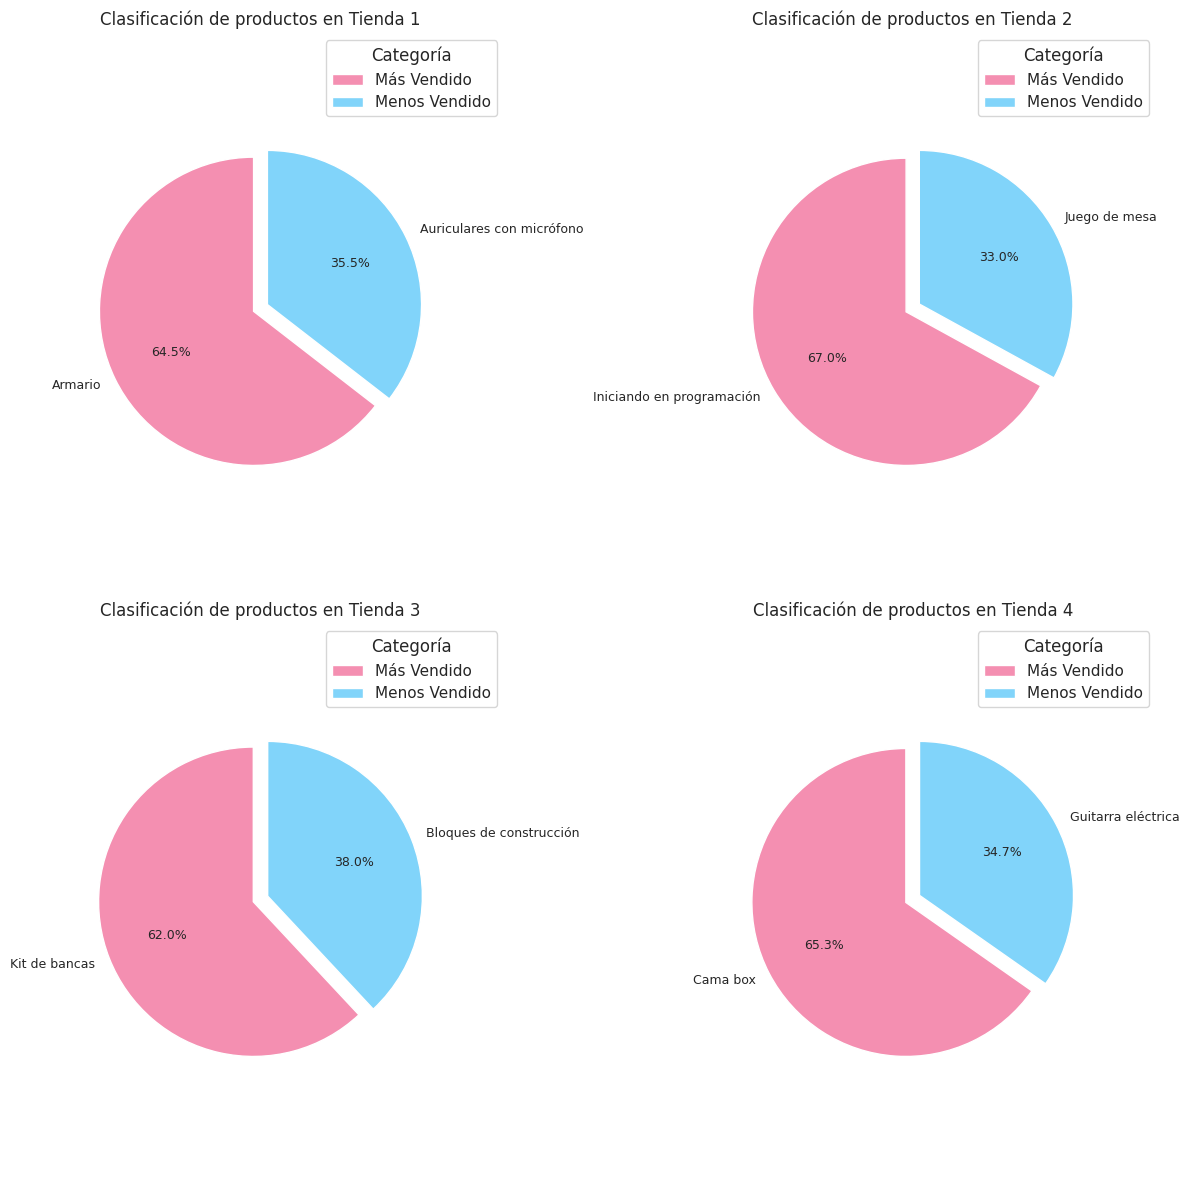

In [152]:
import matplotlib.pyplot as plt

# Colores para cada categoría
color_map = {'Más Vendido': '#f48fb1', 'Menos Vendido': '#81d4fa'}

# Preparar lista de tiendas
tiendas = tabla_productos_extremos['Tienda'].unique()
num_tiendas = len(tiendas)
cols = 2
rows = (num_tiendas + 1) // 2

# Crear figura
fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
axes = axes.flatten()  # Aplanar para iterar fácilmente

# Graficar cada tienda
for i, tienda in enumerate(tiendas):
    ax = axes[i]
    df_tienda = tabla_productos_extremos[tabla_productos_extremos['Tienda'] == tienda]

    labels = df_tienda['Producto']
    sizes = df_tienda['Cantidad de Ventas']
    categorias = df_tienda['Categoria']
    colors = [color_map[cat] for cat in categorias]
    explode = [0.05] * len(labels)

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        textprops={'fontsize': 9}
    )

    ax.set_title(f'Clasificación de productos en {tienda}', fontsize=12)
    ax.axis('equal')

    # Leyenda
    ax.legend(
        wedges,
        categorias,
        title='Categoría',
        loc='upper right',
        bbox_to_anchor=(1.2, 1)
    )


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [154]:
costo_envio_promedio_tienda = tiendas_unificadas.groupby('Tienda')['Costo de envío'].mean().reset_index()
costo_envio_promedio_tienda = costo_envio_promedio_tienda.rename(columns={'Costo de envío': 'Costo de Envío Promedio'})

print("Costo de envío promedio por tienda:")
display(costo_envio_promedio_tienda)

Costo de envío promedio por tienda:


,Tienda,Costo de Envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


### Resumen de Hallazgos Clave

**1. Análisis de Facturación:**
* Se calculó el ingreso total para cada una de las cuatro tiendas. La Tienda 1 generó el mayor ingreso total, seguida por la Tienda 2, Tienda 3 y Tienda 4.

**2. Ventas por Categoría:**
* Se identificaron las categorías de productos más vendidas en cada tienda. En todas las tiendas, la categoría "Muebles" fue consistentemente la más vendida en términos de cantidad de productos.

**3. Calificación Promedio de la Tienda:**
* Se calculó la calificación promedio general para cada tienda. Las calificaciones promedio de las tiendas son bastante similares, oscilando entre 3.98 y 4.05.
* Se calculó la calificación promedio para cada categoría de producto. La categoría "Juguetes" tuvo la calificación promedio más alta, mientras que "Artículos para el hogar" tuvo la más baja.
* Se calculó la calificación promedio para cada producto. "Impresora" tuvo la calificación promedio más alta y "Set de vasos" tuvo la más baja.

**4. Productos Más y Menos Vendidos:**
* Se identificaron los productos individuales más y menos vendidos en cada tienda. Estos productos variaron entre tiendas.
* Se visualizó la cantidad de ventas de los productos más y menos vendidos por tienda en un gráfico de barras, mostrando el nombre del producto y su cantidad de ventas.

**5. Envío Promedio por Tienda:**
* Se calculó el costo de envío promedio para cada tienda. La Tienda 1 tuvo el costo de envío promedio más alto, y la Tienda 4 tuvo el más bajo.

En general, los datos muestran que la Tienda 1 tiene el mayor ingreso, la categoría "Muebles" es popular en todas partes, las calificaciones de los clientes son generalmente buenas, y hay diferencias en los productos más y menos vendidos y los costos de envío entre tiendas.

## Informe de Recomendación para el Sr. Juan

**Introducción**

El presente informe tiene como objetivo principal analizar los datos de las cuatro tiendas proporcionadas para ofrecer una recomendación informada al Sr. Juan sobre cuál de ellas sería la opción más ventajosa para vender. Se han considerado diversos factores clave como los ingresos totales, el rendimiento por categoría de producto, la satisfacción del cliente (a través de las calificaciones promedio), el desempeño individual de los productos y los costos de envío.

**Análisis y Hallazgos Clave**

Se realizaron los siguientes análisis, cuyos resultados se detallan a continuación:

*   **Ingresos Totales:** La Tienda 1 demostró ser la de mayor generación de ingresos, seguida por la Tienda 2, Tienda 3 y, finalmente, la Tienda 4. Esto sugiere que la Tienda 1 tiene el mayor volumen o valor de ventas en general.

*   **Ventas por Categoría:** El análisis por categoría reveló que "Muebles" es consistentemente la categoría más vendida en las cuatro tiendas, lo que indica una fuerte demanda en este segmento. También se identificaron las categorías menos vendidas en cada tienda, lo que podría ser relevante para estrategias de inventario o marketing.

*   **Calificación Promedio de los Clientes:** Las calificaciones promedio generales de las tiendas son bastante similares y se sitúan alrededor de 4 sobre 5, lo que indica un nivel generalmente bueno de satisfacción del cliente en todas las ubicaciones. Sin embargo, al analizar por categoría y producto, se observaron variaciones, destacando "Juguetes" y el producto "Impresora" como los mejor calificados, mientras que "Artículos para el hogar" y "Set de vasos" tuvieron calificaciones más bajas.

*   **Productos Más y Menos Vendidos:** Se identificaron productos específicos que sobresalen (positiva y negativamente) en cada tienda. Esta información es crucial para entender qué productos tienen mayor tracción en cada mercado particular.

*   **Costo de Envío Promedio:** La Tienda 1 presenta el costo de envío promedio más alto, mientras que la Tienda 4 tiene el más bajo. Esto podría impactar la rentabilidad, especialmente para productos de bajo margen o en estrategias de precios.

**Visualizaciones Clave**

Los gráficos generados (ingresos totales por tienda, productos más y menos vendidos por tienda) han permitido visualizar de manera efectiva estas diferencias, facilitando la comparación y la identificación de patrones. Por ejemplo, el gráfico de ingresos totales muestra claramente la brecha entre la Tienda 1 y las demás.

**Recomendación y Justificación**

Considerando todos los factores analizados, **se recomienda al Sr. Juan vender la Tienda 1**.

Aunque la Tienda 1 tiene el costo de envío promedio más alto, su **significativo liderazgo en ingresos totales** la posiciona como la opción más atractiva desde una perspectiva financiera general. Un mayor volumen de ingresos proporciona una base sólida y un potencial de ganancias superior, incluso con costos de envío más elevados.

Si bien las calificaciones promedio son similares entre tiendas, los altos ingresos de la Tienda 1 sugieren que, a pesar del costo de envío, los clientes están comprando activamente, lo que podría indicar una fuerte presencia en el mercado y una base de clientes leal. Las otras tiendas, aunque tienen costos de envío potencialmente más bajos (Tienda 4), no generan el mismo nivel de ingresos.

La información sobre las categorías y productos más y menos vendidos en la Tienda 1 es valiosa para futuras optimizaciones, pero el factor determinante para la venta es el rendimiento financiero general, donde la Tienda 1 destaca claramente.

En resumen, la robusta generación de ingresos de la Tienda 1 la convierte en la opción más prometedora para el Sr. Juan, a pesar de tener un costo de envío promedio más alto en comparación con las otras tiendas.

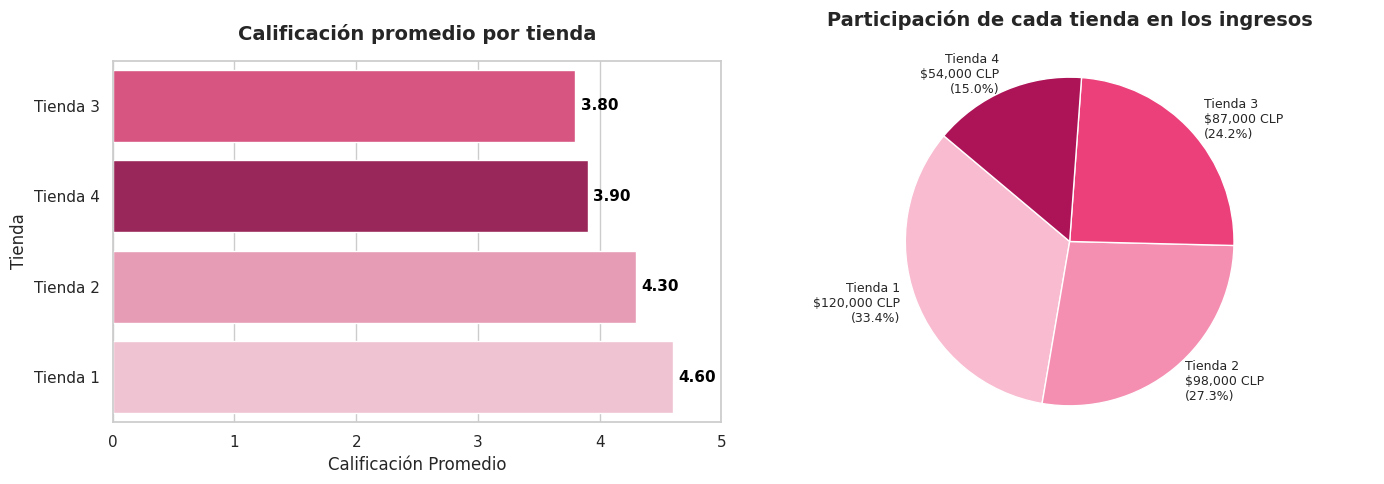

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Datos de ejemplo ===
df_calificaciones = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [4.6, 4.3, 3.8, 3.9]
})

df_ingresos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingresos Totales': [120000, 98000, 87000, 54000]
})

# === Colores consistentes por tienda ===
colores_por_tienda = {
    'Tienda 1': '#f8bbd0',
    'Tienda 2': '#f48fb1',
    'Tienda 3': '#ec407a',
    'Tienda 4': '#ad1457'
}

# === Estilo general ===
sns.set(style="whitegrid")

# === Crear figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes = axes.flatten()

# === 1. Gráfico de barras (Calificación promedio) sin warning
df_sorted = df_calificaciones.sort_values('Calificación Promedio', ascending=True)

sns.barplot(
    data=df_sorted,
    y='Tienda',
    x='Calificación Promedio',
    hue='Tienda',
    palette=colores_por_tienda,
    ax=axes[0],
    legend=False
)

axes[0].set_title('Calificación promedio por tienda', pad=15, fontsize=14, fontweight='bold')
axes[0].set_xlim(0, 5)

# Mostrar valores sobre barras
for container in axes[0].containers:
    axes[0].bar_label(
        container,
        fmt='%.2f',
        padding=4,
        fontsize=11,
        fontweight='bold',
        color='black'
    )

# === 2. Gráfico pastel (Ingresos totales por tienda)
total = df_ingresos['Ingresos Totales'].sum()
labels = [
    f"{row['Tienda']}\n${int(row['Ingresos Totales']):,} CLP\n({row['Ingresos Totales'] / total:.1%})"
    for _, row in df_ingresos.iterrows()
]

# Obtener colores en el mismo orden
palette_pastel = [colores_por_tienda[tienda] for tienda in df_ingresos['Tienda']]

axes[1].pie(
    df_ingresos['Ingresos Totales'],
    labels=labels,
    colors=palette_pastel,
    startangle=140,
    textprops={'fontsize': 9}
)
axes[1].set_title('Participación de cada tienda en los ingresos', pad=25, fontsize=14, fontweight='bold')
axes[1].axis('equal')

plt.tight_layout()
plt.show()
